In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [3]:
# upload do arquivo
# lib que faz em tempo de execucao o upload
from google.colab import files
arq = files.upload()

Saving AdventureWorks.xlsx to AdventureWorks.xlsx


In [5]:
# criando nosso DataFrame df
df = pd.read_excel("AdventureWorks.xlsx")

In [6]:
# visualizando registros
df.head(5)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [7]:
# Quantidade de linhas e colunas
df.shape

(904, 16)

In [8]:
# tipos de dados
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

In [9]:
# Receita total
df["Valor Venda"].sum()

5984606.1426

In [13]:
# Qual o custo Total?
# mul = multiplicacao
# criando a coluna custo
df["custo"] = df["Custo Unitário"].mul(df["Quantidade"]) 
df["custo"]

0      2091.48
1      2091.48
2      2091.48
3      2091.48
4      2091.48
        ...   
899    1985.94
900    1948.14
901    1948.14
902    1985.94
903    1948.14
Name: custo, Length: 904, dtype: float64

In [17]:
# Custo total?
round(df["custo"].sum(), 2)

2486783.05

In [19]:
# Lucro Real
# criar coluna de lucro
df["lucro"] = df["Valor Venda"] - df["custo"]
df["lucro"]

0      2456.52
1      2456.52
2      2456.52
3      2456.52
4      2456.52
        ...   
899    3588.48
900    2755.86
901    2755.86
902    2809.26
903    2755.86
Name: lucro, Length: 904, dtype: float64

In [21]:
df.sample()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro
497,2008-12-21,2008-12-26,307,366,19111,200812213CS669,348.58,758.0,30,3411.0,19329.0,Adventure Works Laptop15.4W M1548 Black,Adventure Works,Adventure Works,Regular,Black,10457.4,8871.6


In [27]:
# criando coluna de data
df["tempo_envio"] = (df['Data Envio'] - df['Data Venda']).dt.days
df["tempo_envio"]

0      20
1       5
2       6
3       6
4       7
       ..
899    13
900    11
901     4
902     4
903     4
Name: tempo_envio, Length: 904, dtype: int64

In [28]:
df["tempo_envio"].dtype

dtype('int64')

In [32]:
# media de tempo de envio por marca
df.groupby('Marca')["tempo_envio"].mean()

Marca
Adventure Works    8.66
Contoso            8.47
Fabrikam           8.51
Name: tempo_envio, dtype: float64

In [33]:
# verificar se tem valor nulls
df.isnull().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
custo             0
lucro             0
tempo_envio       0
dtype: int64

In [41]:
# Agrupar por ano e marca
# mascara para valor grande
pd.options.display.float_format = "{:20,.2f}".format
df.groupby( [ df['Data Venda'].dt.year, 'Marca'] )['lucro'].sum()

Data Venda  Marca          
2008        Adventure Works             306,641.16
            Contoso                      56,416.00
            Fabrikam                  1,557,020.55
2009        Adventure Works             405,395.08
            Contoso                     138,258.95
            Fabrikam                  1,034,091.35
Name: lucro, dtype: float64

In [42]:
# criar as colunas no df com o resultado da linha de comando => reset_index()
lucro_ano = df.groupby([df["Data Venda"].dt.year, "Marca"])["lucro"].sum().reset_index()
lucro_ano

,Data Venda,Marca,lucro
0,2008,Adventure Works,"306,641.16"
1,2008,Contoso,"56,416.00"
2,2008,Fabrikam,"1,557,020.55"
3,2009,Adventure Works,"405,395.08"
4,2009,Contoso,"138,258.95"
5,2009,Fabrikam,"1,034,091.35"


In [43]:
# Qual o total de produtos vendidos?
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=False)

Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64

Text(0, 0.5, 'Produto')

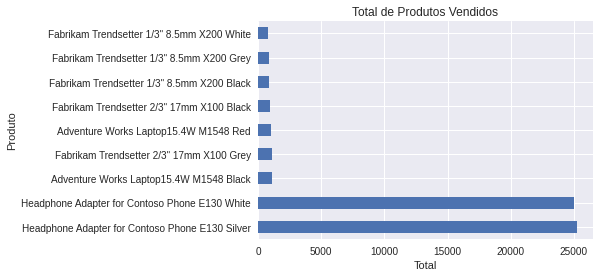

In [44]:
# Grafico Total de Produtos Vendidos
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=False).plot.barh(title="Total de Produtos Vendidos")
plt.xlabel("Total")
plt.ylabel("Produto")

Text(0, 0.5, 'Receita')

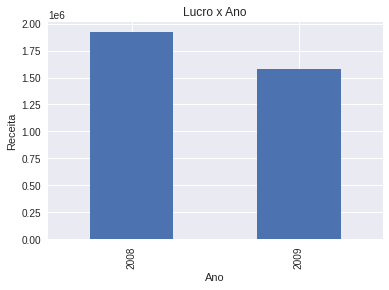

In [45]:
df.groupby(df["Data Venda"].dt.year)["lucro"].sum().plot.bar(title="Lucro x Ano")
plt.xlabel("Ano")
plt.ylabel("Receita")

In [46]:
df.groupby(df["Data Venda"].dt.year)['lucro'].sum()

Data Venda
2008           1,920,077.71
2009           1,577,745.38
Name: lucro, dtype: float64

In [48]:
# Selecionando apenas as Vendas de 2009
df_2009 = df[df["Data Venda"].dt.year == 2009]
df_2009

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,tempo_envio
11,2009-05-02,2009-05-14,199,384,18938,200905023CS847,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
12,2009-05-16,2009-05-27,306,384,19067,200905163CS746,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",11
13,2009-05-31,2009-06-12,306,384,19068,200905313CS748,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
14,2009-06-28,2009-07-11,199,384,18959,200906283CS870,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",13
15,2009-07-08,2009-07-12,306,384,19070,200907083CS757,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890,2009-12-23,2009-12-30,199,1155,19033,200912234CS949,324.69,980.00,6,"1,176.00","4,704.00",Fabrikam Trendsetter 2/3'' 17mm X100 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black,"1,948.14","2,755.86",7
895,2009-01-11,2009-01-18,307,1155,19113,200901114CS680,324.69,980.00,6,882.00,"4,998.00",Fabrikam Trendsetter 2/3'' 17mm X100 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black,"1,948.14","3,049.86",7
896,2009-03-04,2009-03-15,307,1155,19117,200903044CS706,324.69,980.00,6,"1,176.00","4,704.00",Fabrikam Trendsetter 2/3'' 17mm X100 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black,"1,948.14","2,755.86",11
897,2009-06-12,2009-06-22,307,1226,19126,200906124CS716,330.99,999.00,6,599.40,"5,394.60",Fabrikam Trendsetter 1/3'' 8.5mm X200 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black,"1,985.94","3,408.66",10


Text(0, 0.5, 'Lucro')

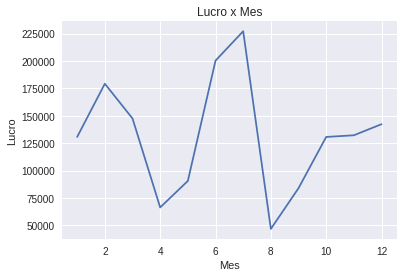

In [49]:
df_2009.groupby(df_2009["Data Venda"].dt.month)['lucro'].sum().plot(title="Lucro x Mes")
plt.xlabel("Mes")
plt.ylabel("Lucro")

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

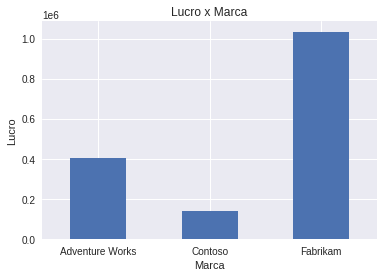

In [52]:
df_2009.groupby("Marca")["lucro"].sum().plot.bar(title="Lucro x Marca")
plt.xlabel("Marca")
plt.ylabel("Lucro")
plt.xticks(rotation='horizontal')

Text(0, 0.5, 'Lucro')

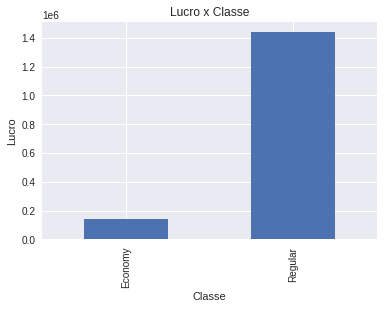

In [53]:
df_2009.groupby("Classe")["lucro"].sum().plot.bar(title="Lucro x Classe")
plt.xlabel("Classe")
plt.ylabel("Lucro")

In [54]:
df["tempo_envio"].describe()

count                 904.00
mean                    8.54
std                     3.06
min                     4.00
25%                     6.00
50%                     9.00
75%                    11.00
max                    20.00
Name: tempo_envio, dtype: float64

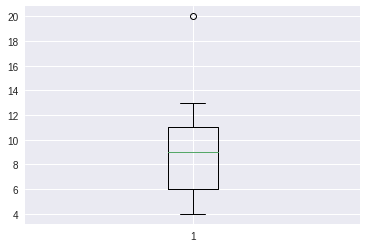

In [57]:
# Grafico de Boxplot
plt.boxplot(df["tempo_envio"]);

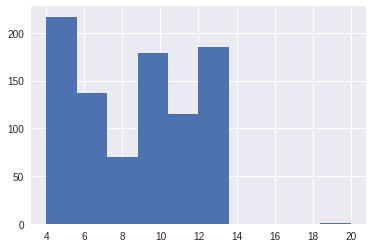

In [58]:
plt.hist(df["tempo_envio"]);

In [60]:
# tempo min de envio
df["tempo_envio"].min()

4

In [61]:
# tempo max de envio
df["tempo_envio"].max()

20

In [62]:
# Encontrar o Outlier
df[df["tempo_envio"]==20]

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20


In [63]:
# Saida = Salvar em arquivo final
df.to_csv("df_vendas_novo.csv", index=False)